In [128]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set() #for plot atyling
train = pd.read_csv('../data/raw/train.csv',sep=';', decimal = ',')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


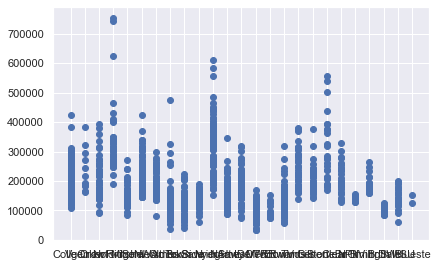

In [129]:
import matplotlib.pyplot as plt
xs = train['Neighborhood']
ys = train['SalePrice']
plt.scatter (xs,ys)
plt.show()

In [130]:
df=train[['Neighborhood','SalePrice']]
df.head()

#from sklearn.datasets.samples_generator import make_blobs
#from sklearn.metrics import pairwise_distances_argmin
from sklearn.cluster import KMeans

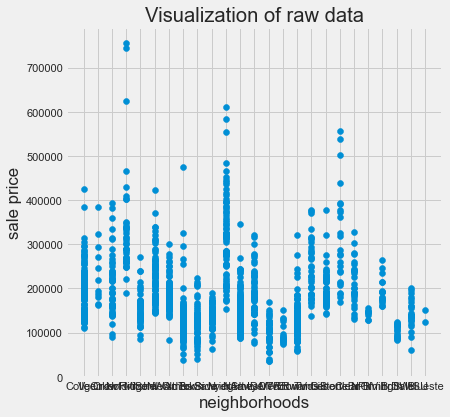

In [131]:
# Modules
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

# Import the data
df=train[['Neighborhood','SalePrice']]
df.head()

# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.xlabel('neighborhoods')
plt.ylabel('sale price')
plt.title('Visualization of raw data');

In [132]:
train['Neighborhood'] = train['Neighborhood'].replace(['NAmes'], "0")
train['Neighborhood'] = train['Neighborhood'].replace(['NAme'], "1")
train['Neighborhood'] = train['Neighborhood'].replace(['CollgCr'],"2")
train['Neighborhood'] = train['Neighborhood'].replace(['OldTown'],"3")
train['Neighborhood'] = train['Neighborhood'].replace(['Edwards'],"4")
train['Neighborhood'] = train['Neighborhood'].replace(['Somerst'],"5")
train['Neighborhood'] = train['Neighborhood'].replace(['Gilbert'],"6")
train['Neighborhood'] = train['Neighborhood'].replace(['NridgHt'],"7")
train['Neighborhood'] = train['Neighborhood'].replace(['Sawyer'],"8")
train['Neighborhood'] = train['Neighborhood'].replace(['NWAmes'],"9")
train['Neighborhood'] = train['Neighborhood'].replace(['SawyerW'],"10")
train['Neighborhood'] = train['Neighborhood'].replace(['BrkSide'],"11")
train['Neighborhood'] = train['Neighborhood'].replace(['Crawfor'],"12")
train['Neighborhood'] = train['Neighborhood'].replace(['Mitchel'],"13")
train['Neighborhood'] = train['Neighborhood'].replace(['NoRidge'],"14")
train['Neighborhood'] = train['Neighborhood'].replace(['Timber'],"15")
train['Neighborhood'] = train['Neighborhood'].replace(['IDOTRR'],"16")
train['Neighborhood'] = train['Neighborhood'].replace(['ClearCr'],"17")
train['Neighborhood'] = train['Neighborhood'].replace(['StoneBr'],"18")
train['Neighborhood'] = train['Neighborhood'].replace(['Blmngtn'],"19")
train['Neighborhood'] = train['Neighborhood'].replace(['SWISU'],"20")
train['Neighborhood'] = train['Neighborhood'].replace(['MeadowV'],"21")
train['Neighborhood'] = train['Neighborhood'].replace(['BrDale'],"22")
train['Neighborhood'] = train['Neighborhood'].replace(['Veenker'],"23")
train['Neighborhood'] = train['Neighborhood'].replace(['NPkVill'],"24")
train['Neighborhood'] = train['Neighborhood'].replace(['Blueste'],"25")


train['Neighborhood'] = train['Neighborhood'].astype(int)

df=train[['Neighborhood','SalePrice']]
df.head()


,Neighborhood,SalePrice
0,2,208500
1,23,181500
2,2,223500
3,12,140000
4,14,250000


In [133]:
X = df.iloc[:, 0:2].values

In [134]:
X

array([[     2, 208500],
       [    23, 181500],
       [     2, 223500],
       ...,
       [    12, 266500],
       [     0, 142125],
       [     4, 147500]], dtype=int64)

In [135]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'random')

In [136]:
kmeans.fit(X)

KMeans(init='random', n_clusters=3)

In [137]:
kmeans.cluster_centers_

array([[1.00583333e+01, 3.72625942e+05],
       [6.76566416e+00, 1.28944190e+05],
       [7.96125461e+00, 2.15004371e+05]])

In [138]:
distance = kmeans.fit_transform(X)
distance

array([[  6504.37358045,  79555.80966655, 164125.94186449],
       [ 33504.37422385,  52555.81203118, 191125.94210482],
       [  8495.63124275,  94555.80964391, 149125.94188439],
       ...,
       [ 51495.62930967, 137555.8096234 , 106125.94168443],
       [ 72879.37128355,  13180.81126021, 230500.94188612],
       [ 67504.37096493,  18555.80972991, 225125.94174818]])

In [139]:
labels = kmeans.labels_
labels

array([0, 0, 0, ..., 0, 1, 1])

1 9207911389976.395
2 3610807276263.22
3 2012269552640.586
4 1275277161569.3176
5 962019191995.594
6 624918127778.6506
7 433681124065.9892
8 355858003948.2198
9 275244005710.6575
10 235691372001.43335


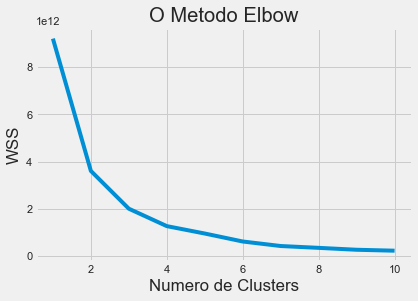

In [140]:
from sklearn.cluster import KMeans
wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(X)
    print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

In [141]:
data = [
        [ 4.12, 3.4],
        [ 5.2, 5.8],
        [ 3.1, 3.5]
    ]
kmeans.predict(data)


array([1, 1, 1])

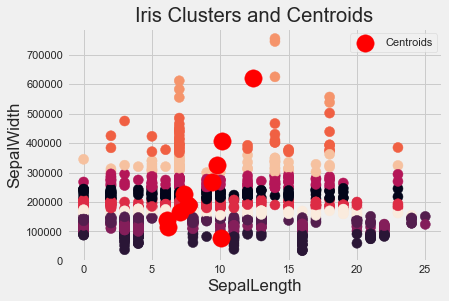

In [142]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:,1], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red',label = 'Centroids')
plt.title('Iris Clusters and Centroids')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend()

plt.show()

In [143]:
clusters = kmeans.predict(X)
clusters

array([5, 5, 0, ..., 4, 2, 2])

In [144]:
kmeans.cluster_centers_

array([[7.37341772e+00, 2.26721449e+05],
       [1.00679612e+01, 7.93403689e+04],
       [6.08064516e+00, 1.38465206e+05],
       [6.16666667e+00, 1.13686685e+05],
       [9.41592920e+00, 2.68483265e+05],
       [7.67298578e+00, 1.90752033e+05],
       [1.01428571e+01, 4.08508857e+05],
       [1.23750000e+01, 6.21146375e+05],
       [9.76119403e+00, 3.23941448e+05],
       [7.06896552e+00, 1.64881263e+05]])

In [145]:
train['Cluster Neighborhood'] = clusters

In [146]:
train.drop('Neighborhood',axis=1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Cluster Neighborhood
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,5
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,2
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,9
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,0
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,4
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,2


In [166]:
    df_k=df[['Neighborhood','SalePrice']]
    
    import numpy as np
    from sklearn.datasets.samples_generator import (make_blobs,
                                                    make_circles,
                                                    make_moons)
    from sklearn.cluster import KMeans, SpectralClustering
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import silhouette_samples, silhouette_score
    from warnings import filterwarnings
    filterwarnings('ignore')

    df_k['Neighborhood'] = df_k['Neighborhood'].replace(['NAmes'], "0")
    df_k['Neighborhood'] = df_k['Neighborhood'].replace(['NAme'], "1")
    df_k['Neighborhood'] = df_k['Neighborhood'].replace(['CollgCr'],"2")
    df_k['Neighborhood'] = df_k['Neighborhood'].replace(['OldTown'],"3")
    df_k['Neighborhood'] = df_k['Neighborhood'].replace(['Edwards'],"4")
    df_k['Neighborhood'] = df_k['Neighborhood'].replace(['Somerst'],"5")
    df_k['Neighborhood'] = df_k['Neighborhood'].replace(['Gilbert'],"6")
    df_k['Neighborhood'] = df_k['Neighborhood'].replace(['NridgHt'],"7")
    df_k['Neighborhood'] = df_k['Neighborhood'].replace(['Sawyer'],"8")
    df_k['Neighborhood'] = df_k['Neighborhood'].replace(['NWAmes'],"9")
    df_k['Neighborhood'] = df_k['Neighborhood'].replace(['SawyerW'],"10")
    df_k['Neighborhood'] = df_k['Neighborhood'].replace(['BrkSide'],"11")
    df_k['Neighborhood'] = df_k['Neighborhood'].replace(['Crawfor'],"12")
    df_k['Neighborhood'] = df_k['Neighborhood'].replace(['Mitchel'],"13")
    df_k['Neighborhood'] = df_k['Neighborhood'].replace(['NoRidge'],"14")
    df_k['Neighborhood'] = df_k['Neighborhood'].replace(['Timber'],"15")
    df_k['Neighborhood'] = df_k['Neighborhood'].replace(['IDOTRR'],"16")
    df_k['Neighborhood'] = df_k['Neighborhood'].replace(['ClearCr'],"17")
    df_k['Neighborhood'] = df_k['Neighborhood'].replace(['StoneBr'],"18")
    df_k['Neighborhood'] = df_k['Neighborhood'].replace(['Blmngtn'],"19")
    df_k['Neighborhood'] = df_k['Neighborhood'].replace(['SWISU'],"20")
    df_k['Neighborhood'] = df_k['Neighborhood'].replace(['MeadowV'],"21")
    df_k['Neighborhood'] = df_k['Neighborhood'].replace(['BrDale'],"22")
    df_k['Neighborhood'] = df_k['Neighborhood'].replace(['Veenker'],"23")
    df_k['Neighborhood'] = df_k['Neighborhood'].replace(['NPkVill'],"24")
    df_k['Neighborhood'] = df_k['Neighborhood'].replace(['Blueste'],"25")

    df_k['Neighborhood'] = df_k['Neighborhood'].astype(int)

    X = df_k.iloc[:, 0:2].values
    kmeans = KMeans(n_clusters = 3, init = 'random')

    kmeans.fit(X)
    kmeans.cluster_centers_
    distance = kmeans.fit_transform(X)
    labels = kmeans.labels_
    
    for i in range(1, 11):
        kmeans = KMeans(n_clusters = i, init = 'random')
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)  

    clusters = kmeans.predict(X)
    clusters
    kmeans.cluster_centers_

    df['Cluster Neighborhood'] = clusters
    df.drop('Neighborhood',axis=1)


,SalePrice,Cluster Neighborhood
0,208500,5
1,181500,5
2,223500,8
3,140000,1
4,250000,6
...,...,...
1455,175000,9
1456,210000,8
1457,266500,6
1458,142125,1


,SalePrice,Cluster Neighborhood
0,208500,3
1,181500,0
2,223500,8
3,140000,9
4,250000,7
...,...,...
1455,175000,0
1456,210000,3
1457,266500,7
1458,142125,9
